In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
save_losses = []
dev_disc_costs = []
if os.path.exists('./defensive_models/cifar10_losses_gp.pickle'):
    with open ('./defensive_models/cifar10_losses_gp.pickle', 'rb') as fp:
            save_losses = pickle.load(fp)
if os.path.exists('./defensive_models/dev_disc_costs.pickle'):
        with open ('./defensive_models/dev_disc_costs.pickle', 'rb') as fp:
            dev_disc_costs = pickle.load(fp)

In [6]:
save_losses[0][0]

812.015380859375

In [7]:
len(save_losses)

42400

In [8]:
dev_disc_costs[0]

-5.927277975021654

In [9]:
len(dev_disc_costs)

42

In [10]:
dev_disc_costs

[-5.927277975021654,
 -5.68593505081857,
 -4.3214466602179655,
 -3.681942977723043,
 -6.242414708350115,
 -5.389830027416253,
 -6.1049533953332595,
 -2.5513656883482723,
 -3.6529202734588817,
 -3.232706387331531,
 -2.829539942893253,
 -3.3959559589434583,
 -1.8621628254082552,
 -1.9289686330564462,
 -1.9789324566057533,
 0.45925733788757567,
 -0.776774807910251,
 0.8991182552781075,
 -2.6749070905576087,
 -1.298152578104833,
 -0.7381658259850399,
 -3.335300794832266,
 1.04244886196343,
 -2.0843588455467468,
 -0.8783976974760651,
 0.4103853942434879,
 1.2852190406459152,
 -2.770914817311961,
 -3.123505906694254,
 -0.20588080329927289,
 -1.8594237330612864,
 -1.417683031908266,
 0.4526766949588326,
 0.10388408482644208,
 0.7121662381727984,
 1.8381252000286321,
 1.1657889436005027,
 0.6180604316626385,
 -0.723023550145945,
 0.5823469588141532,
 -0.8049764058012872,
 1.3269820000715316]

In [3]:
x=[]
for i in range(30000):
    x.append(i)
len(x)

30000

In [4]:
x[0]

0

In [5]:
x1 = x
x2 = x
y1=[]
y2=[]
for i in range(30000):
    y1.append(save_losses[x[i]][0])
    y2.append(save_losses[x[i]][1])

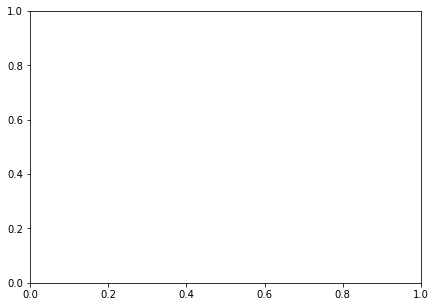

In [6]:
fig = plt.figure(figsize = (7,5))       #figsize是图片的大小`
ax1 = fig.add_subplot(1, 1, 1) # ax1是子图的名字`

Text(0.5, 1.0, 'Compare loss for different models in training')

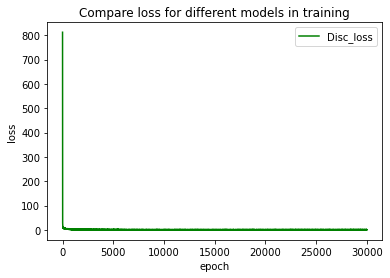

In [7]:
pl.plot(x1,y1,'g-',label=u'Disc_loss')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。

pl.legend()
#显示图例
pl.xlabel(u'epoch')
pl.ylabel(u'loss')
plt.title('Compare loss for different models in training')

Text(0.5, 1.0, 'Compare loss for different models in training')

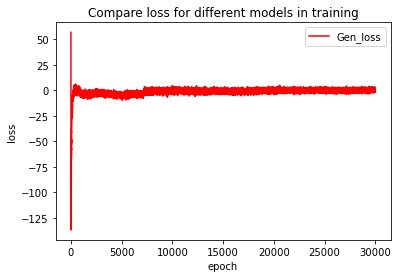

In [8]:
pl.plot(x2,y2,'r-',label=u'Gen_loss')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。

pl.legend()
#显示图例
pl.xlabel(u'epoch')
pl.ylabel(u'loss')
plt.title('Compare loss for different models in training')

In [12]:
x3 = []
y3 = []
for i in range(len(dev_disc_costs)):
    x3.append((i+1)*1000)
    y3.append(dev_disc_costs[i])
len(x3)

42

Text(0.5, 1.0, 'Compare loss for different models in training')

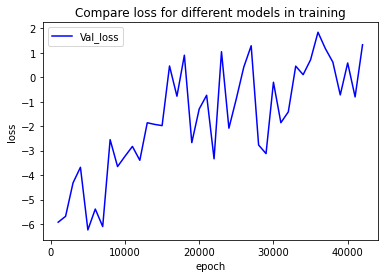

In [13]:
pl.plot(x3,y3,'b-',label=u'Val_loss')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。

pl.legend()
#显示图例
pl.xlabel(u'epoch')
pl.ylabel(u'loss')
plt.title('Compare loss for different models in training')

In [11]:
epsilon = [0.0,0.002,0.01,0.05,0.1,0.2]
FGSM = [0.9784,0.0160,0.0062,0.0008,0.0004,0.0004]
DF = [0.9784,0.0009,0.0007,0.0004,0.0003,0.0068]
CW = [0.9784,0.0068,0.0060,0.0031,0.0017,0.0013]
recon = [0.968,0.8,0.75,0.72,0.43,0.3]
orig = [0.9784,0.9784,0.9784,0.9784,0.9784,0.9784]

Text(0.5, 1.0, 'Under FGSM attack by different epsilon')

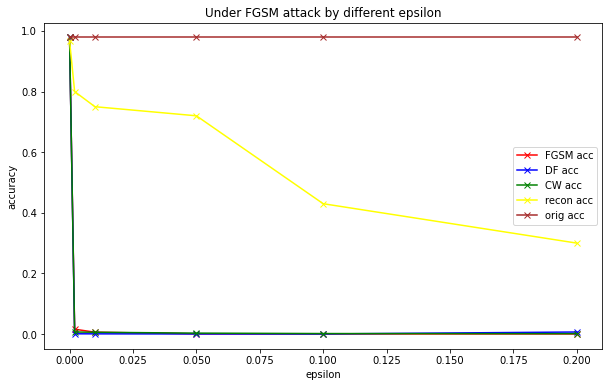

In [12]:
fig = plt.figure(figsize = (10,6))
pl.plot(epsilon,FGSM,color = 'red',label=u'FGSM acc',marker = 'x')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
pl.plot(epsilon,DF,color = 'blue',label=u'DF acc',marker = 'x')
pl.plot(epsilon,CW,color = 'green',label=u'CW acc',marker = 'x')
pl.plot(epsilon,recon,color = 'yellow',label=u'recon acc',marker = 'x')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
pl.plot(epsilon,orig,color = 'brown',label=u'orig acc',marker = 'x')
pl.legend()
#显示图例
pl.xlabel(u'epsilon')
pl.ylabel(u'accuracy')
plt.title('Under FGSM attack by different epsilon')

Text(0.5, 1.0, 'Under FGSM attack by different epsilon')

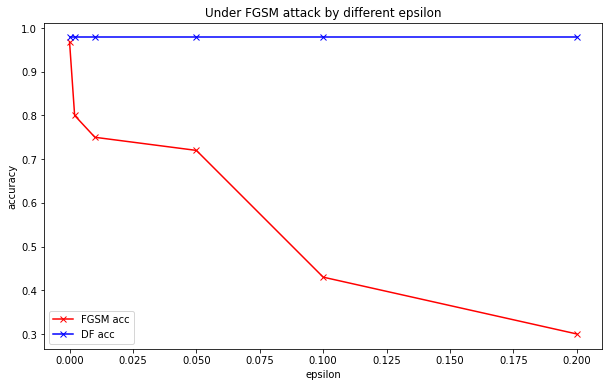

In [8]:
fig = plt.figure(figsize = (10,6))
pl.plot(epsilon,recon,color = 'red',label=u'FGSM acc',marker = 'x')
# ‘’g‘’代表“green”,表示画出的曲线是绿色，“-”代表画的曲线是实线，可自行选择，label代表的是图例的名称，一般要在名称前面加一个u，如果名称是中文，会显示不出来，目前还不知道怎么解决。
pl.plot(epsilon,orig,color = 'blue',label=u'DF acc',marker = 'x')
pl.legend()
#显示图例
pl.xlabel(u'epsilon')
pl.ylabel(u'accuracy')
plt.title('Under FGSM attack by different epsilon')